In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
def save_fig(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs):
    fig_filename="train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    ax = plt.figure().gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(train_error,label="Train")
    plt.plot(val_error,label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error (RMSE)")
    #plt.ylim(0.5,1.1)
    plt.legend()
    if "genres" in X_filename:
        plt.savefig("figures/"+fig_filename+"_with_genres.pdf")
    else:
        plt.savefig("figures/"+fig_filename+".pdf")
def save_error(train_error, val_error,X_filename,num_factor,learning_rate,nr_epochs):
    txt_filename="train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    data = np.array([train_error,val_error])
    if "genres" in X_filename:
        np.savetxt("error/"+txt_filename+"_with_genres.txt",data)
    else:
        np.savetxt("error/"+txt_filename+".txt",data)
    
#plt.show()

In [48]:
import numpy as np
from scipy import sparse
from pyfm import pylibfm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_filename = "ml_latest_small_formated_with_genres.npz"
#X_filename = "ml_latest_small_formated.npz"
X = sparse.load_npz(X_filename)
filename="ml-latest-small/ratings.csv"
data=np.genfromtxt(filename,skip_header=1,delimiter=",")
y = data[:,-2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print("Training size: %d, Validation size: %d, Test size: %d" % (X_train.shape[0],X_val.shape[0],X_test.shape[0]))



#num_factor=15
#learning_rate=0.001
learning_rate_arr=[0.0006,0.0007,0.0008]#np.linspace(0.0001,0.001,10)
num_factor_arr=[6,8,10,12,14,16,18,20,30,40]
nr_epochs=100
min_epoch=30
es_buffer=10 #Stop when the validation error is larger than the value 10 before it
error_dict={}

for learning_rate in learning_rate_arr:
    for num_factor in num_factor_arr:
        fm = pylibfm.FM(num_cols=np.max(X_train.indices) + 1, num_factor=num_factor, task="regression", learning_rate=learning_rate)
        train_error=[]
        val_error=[]
        early_stopping = False
        nr_epochs=0
        while early_stopping==False:
        #for i in range(nr_epochs):
            fm.learn(X_train, y_train)
            preds_train = fm.predict(X_train)
            preds_test = fm.predict(X_val)
            train_error_tmp = mean_squared_error(y_train, preds_train,squared=False)    # RMSE
            val_error_tmp = mean_squared_error(y_val, preds_test,squared=False)        # RMSE
            train_error.append(train_error_tmp)
            val_error.append(val_error_tmp)
            if nr_epochs>min_epoch:
                if val_error_tmp>val_error[-es_buffer]:
                    early_stopping=True
            print("Train FM RMSE: %.4f Validation FM RMSE: %.4f Epoch: %d" % (train_error_tmp, val_error_tmp, nr_epochs))
            nr_epochs+=1
        error_dict[str(learning_rate)+"_"+str(num_factor)+"_train"]=train_error
        error_dict[str(learning_rate)+"_"+str(num_factor)+"_val"]=val_error
        save_error(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs)
        save_fig(train_error,val_error,X_filename,num_factor,learning_rate,nr_epochs)

Training size: 756, Validation size: 252, Test size: 99828
Train FM RMSE: 1.9150 Validation FM RMSE: 2.0054 Epoch: 0
Train FM RMSE: 1.3399 Validation FM RMSE: 1.4403 Epoch: 1
Train FM RMSE: 1.1918 Validation FM RMSE: 1.2938 Epoch: 2
Train FM RMSE: 1.1495 Validation FM RMSE: 1.2509 Epoch: 3
Train FM RMSE: 1.1301 Validation FM RMSE: 1.2315 Epoch: 4
Train FM RMSE: 1.1167 Validation FM RMSE: 1.2188 Epoch: 5
Train FM RMSE: 1.1056 Validation FM RMSE: 1.2088 Epoch: 6
Train FM RMSE: 1.0957 Validation FM RMSE: 1.2003 Epoch: 7
Train FM RMSE: 1.0868 Validation FM RMSE: 1.1929 Epoch: 8
Train FM RMSE: 1.0784 Validation FM RMSE: 1.1863 Epoch: 9
Train FM RMSE: 1.0706 Validation FM RMSE: 1.1802 Epoch: 10
Train FM RMSE: 1.0632 Validation FM RMSE: 1.1747 Epoch: 11
Train FM RMSE: 1.0562 Validation FM RMSE: 1.1696 Epoch: 12
Train FM RMSE: 1.0496 Validation FM RMSE: 1.1649 Epoch: 13
Train FM RMSE: 1.0431 Validation FM RMSE: 1.1605 Epoch: 14
Train FM RMSE: 1.0370 Validation FM RMSE: 1.1564 Epoch: 15
Train F

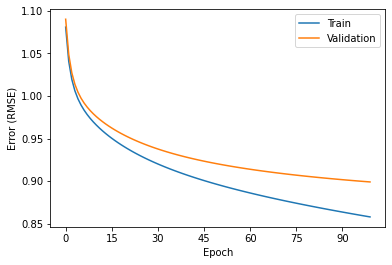

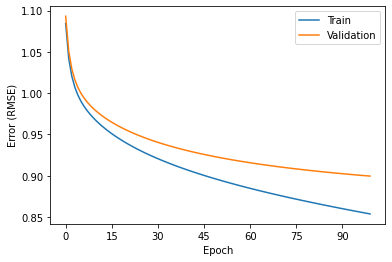

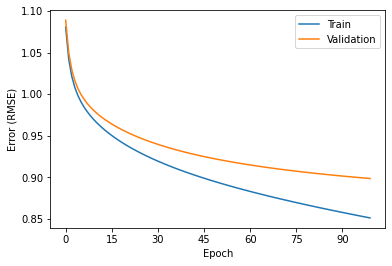

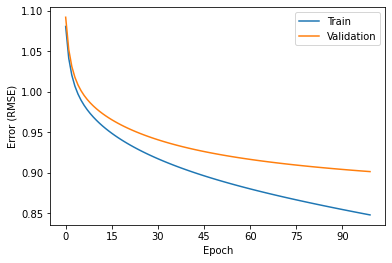

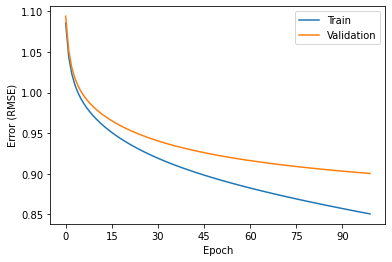

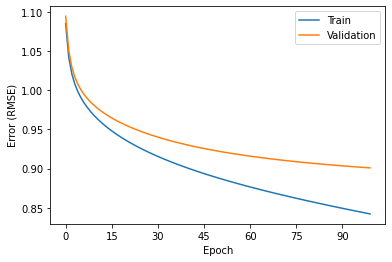

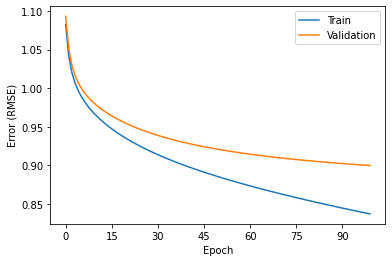

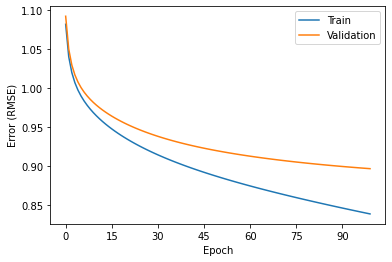

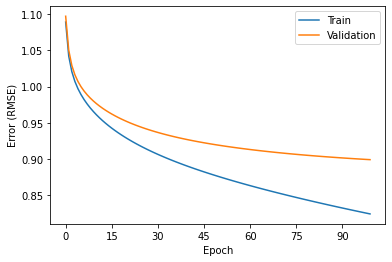

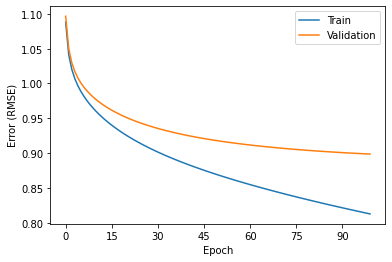

In [31]:
#Used to change from MSE->RMSE manually, useless now
"""
error_dict
#for key in error_dict.keys():
#    print(key)
fig_filename = "train_val_error_NF"+str(num_factor)+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
learning_rate=learning_rate_arr[0]
for i in range(10):
    trainkey=str(learning_rate)+str(num_factor_arr[i])+"train"
    valkey=str(learning_rate)+str(num_factor_arr[i])+"val"
    fig_filename = "train_val_error_NF"+str(num_factor_arr[i])+"_LR"+str(learning_rate)+"_E"+str(nr_epochs)
    train_error = np.sqrt(error_dict[trainkey])
    val_error = np.sqrt(error_dict[valkey])
    save_fig(train_error,val_error,X_filename,num_factor_arr[i],learning_rate,100)
"""